# **Loading data**

In [4]:
from google.colab import files

uploadedFiles = files.upload()

Saving orders.csv to orders.csv
Saving stopWords.txt to stopWords.txt


In [5]:
from io import StringIO, BytesIO
import pandas as pd

In [6]:
def decode(fileName):
  return StringIO(uploadedFiles[fileName + '.txt'].decode("utf-8"))

In [7]:
def read(fileName, fileType):
  if fileType == 'csv':
    return pd.read_csv(BytesIO(uploadedFiles[fileName + '.csv']))
  return decode(fileName).read()

In [8]:
def get_input(name):
  return input("please enter " + name + " file name:  ")

In [9]:
orders = read(get_input('orders'), 'csv')

please enter orders file name:  orders


In [10]:
stopwords = read(get_input('stop word'), 'text')

please enter stop word file name:  stopWords


# **after loaded**

In [2]:
import pandas as pd

In [80]:
with open('stopWords.txt') as f:
    stopwords = f.read()

In [224]:
orders = pd.read_csv('orders.csv', header = 0)

# **Exploring data**

In [11]:
import seaborn as sns

**information of the order file**

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID_Order               200000 non-null  int64 
 1   ID_Customer            200000 non-null  int64 
 2   ID_Item                200000 non-null  int64 
 3   DateTime_CartFinalize  200000 non-null  object
 4   Amount_Gross_Order     200000 non-null  int64 
 5   city_name_fa           200000 non-null  object
 6   Quantity_item          200000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 10.7+ MB


**First 5 rows of the order file**

In [177]:
orders.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,50:56.0,597982,محمود آباد,1
1,11104039,3063877,248497,29:26.0,980000,خرمدره,1
2,4228130,3184893,50144,30:08.0,229358,قرچک,1
3,22225624,6888562,70208,37:19.0,16514,قم,1
4,4068771,2533490,67627,51:02.0,133028,تهران,1


**pie chart of city names**

<Axes: ylabel='city_name_fa'>

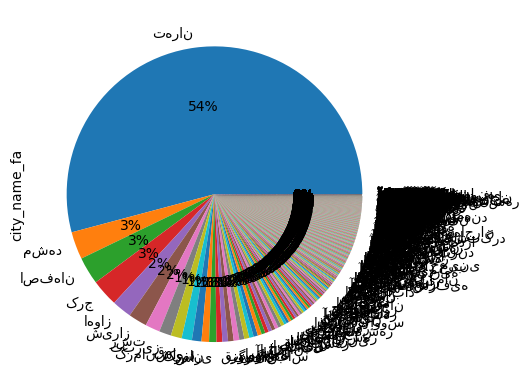

In [14]:
orders.city_name_fa.value_counts().plot(kind='pie', autopct='%1.0f%%')

**pie chart of quantity item**

<Axes: ylabel='Quantity_item'>

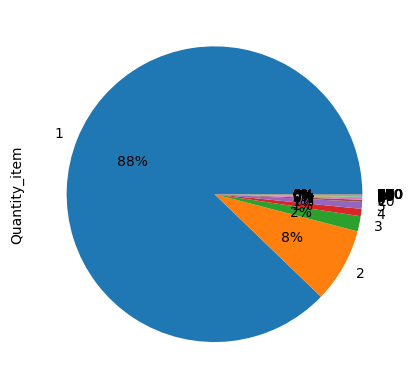

In [15]:
orders.Quantity_item.value_counts().plot(kind='pie', autopct='%1.0f%%')

**bar chart of city name and quantity item**

<Axes: xlabel='city_name_fa', ylabel='Quantity_item'>

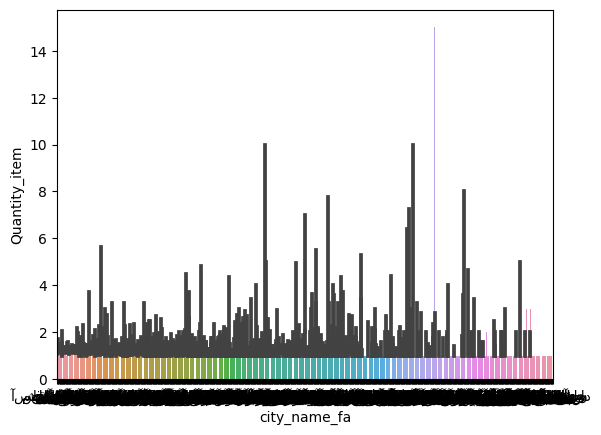

In [16]:
sns.barplot(x='city_name_fa', y='Quantity_item' , data=orders)

**creating a dataframe with the number of items bought in more than one-item-bought orders**

In [17]:
def extract_orders_with_the_same(ids):
  return orders[ids.isin(ids[ids.duplicated()])].sort_values('ID_Order').reset_index(drop=True)

In [19]:
def index_IdOrder_from_zero(df):
  df['ID_Order'] = df.index

  return df

In [137]:
def create_df_with_order_itemsets(df):
  itemBought = df.groupby('ID_Order').aggregate({'ID_Item': lambda x: tuple(x)}).reset_index(drop=True)

  return index_IdOrder_from_zero(itemBought)

In [180]:
def create_df_with_count_of(df):

  itemBought = create_df_with_order_itemsets(df)

  for i in range(len(itemBought)):
    itemBought.at[i, 'Count'] = len(itemBought.at[i, 'ID_Item'])

  return itemBought

In [225]:
ids = orders["ID_Order"]

item_bought = create_df_with_count_of(extract_orders_with_the_same(ids))

In [226]:
item_bought

,ID_Item,ID_Order,Count
0,"(12345, 11654)",0,2.0
1,"(11654, 16144)",1,2.0
2,"(13909, 15785)",2,2.0
3,"(23147, 23552)",3,2.0
4,"(23199, 23665)",4,2.0
...,...,...,...
2315,"(1331920, 139525)",2315,2.0
2316,"(2016236, 75530)",2316,2.0
2317,"(1571059, 644222)",2317,2.0
2318,"(759563, 1938178)",2318,2.0


**bar chart of the number of items bought in more than one-item-bought orders**

<Axes: xlabel='ID_Order', ylabel='Count'>

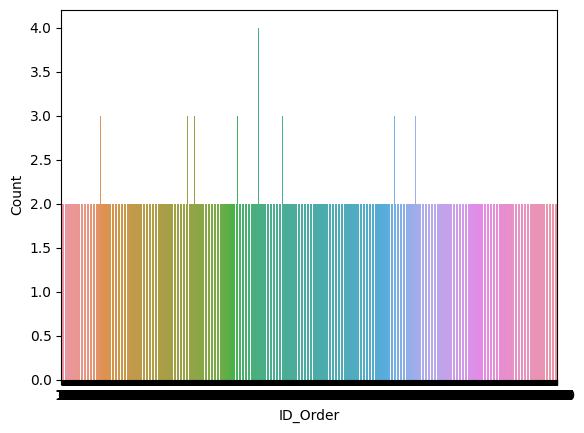

In [130]:
sns.barplot(x='ID_Order', y='Count' , data=item_bought)

# **Preprocessing**

In [183]:
def delete_dup(df, column):
  return df.drop_duplicates(subset=[column],inplace=True)  #dropping duplicates

In [184]:
def delete_nan(df, column):
  return df.dropna(subset=[column], inplace=True)

In [185]:
orders = orders[['city_name_fa']]

In [186]:
orders

,city_name_fa
0,محمود آباد
1,خرمدره
2,قرچک
3,قم
4,تهران
...,...
199995,تهران
199996,محمدیه
199997,اصفهان
199998,همدان


In [187]:
delete_dup(orders, 'city_name_fa')
delete_nan(orders, 'city_name_fa')

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 199254
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city_name_fa  906 non-null    object
dtypes: object(1)
memory usage: 14.2+ KB


<ipython-input-183-fee7d07d45c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df.drop_duplicates(subset=[column],inplace=True)  #dropping duplicates
<ipython-input-184-a343d87becf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return df.dropna(subset=[column], inplace=True)


In [188]:
delete_nan(item_bought, 'ID_Item')

item_bought.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID_Item   2320 non-null   object 
 1   ID_Order  2320 non-null   int64  
 2   Count     2320 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 54.5+ KB


In [189]:
orders.head()

,city_name_fa
0,محمود آباد
1,خرمدره
2,قرچک
3,قم
4,تهران


In [190]:
import re
from nltk.tokenize import RegexpTokenizer

In [191]:
tokenizer = RegexpTokenizer('\s+', gaps = True)

In [192]:
def tokenize_text(text):
  return tokenizer.tokenize(re.sub("\W", " ", text))

In [193]:
stopwords = tokenize_text(stopwords)

In [194]:
print(stopwords)

['و', 'در', 'به', 'از', 'كه', 'مي', 'می', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك', 'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز', 'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر', 'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس', 'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده', 'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند', 'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند', 'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي', 'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف', 'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي', 'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر', 'براساس', 'شدند', 'ترين', 'امروز', 'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 

In [195]:
def delete_stopwords(tokens):
  filtered_tokens = ''

  for word in tokens:
    if word not in stopwords:
      filtered_tokens = filtered_tokens + ' ' + word

  return filtered_tokens

In [196]:
orders

,city_name_fa
0,محمود آباد
1,خرمدره
2,قرچک
3,قم
4,تهران
...,...
193151,سبزدشت
193582,حسینیه
197923,اختیار آباد
198245,گرگاب


In [197]:
import pandas as pd

In [198]:
def change_row_val(tr, row, newVal):
  newVal = set(tokenize_text(newVal))
  return tr.replace(row, str(newVal), inplace = True)

In [199]:
def delete_empty_rows(tr):
  return tr.drop(tr[tr.column == ' '].index, inplace = True)

In [200]:
def update_transaction(tr):
  for row in tr.itertuples():
    change_row_val(tr, str(row.column), delete_stopwords(tokenize_text(str(row.column))))

  return delete_empty_rows(tr)

# **Apriori Algorithm**

In [156]:
def find_it(isFirst, group, row, typ):
  if isFirst:
    if typ == 'string':
      return group in str(row.column)
    return group in row.column
  else:
    if typ == 'string':
      rowSet = set(tokenize_text(str(row.column)))
    else:
      rowSet = set(row.column)
    return set(group).intersection(rowSet) == set(group)

In [157]:
def find_freq(tr, theSet, isFirst, typ):
  count_item = {}

  for group in theSet:
    freq = 0
    for row in tr.itertuples():
      if find_it(isFirst, group, row, typ):
        freq = freq + 1

    count_item[group] = freq

  return count_item

In [158]:
def create_table(countItem):
  data = pd.DataFrame()

  data['itemset'] = countItem.keys()
  data['frequency'] = countItem.values()

  return data

In [159]:
def prune(data, supp):
    return data[data.frequency >= supp]

In [207]:
def join(list_of_items, typ):
    itemsets = []
    i = 1

    for entry in list_of_items:
        proceding_items = list_of_items[i:]
        for item in proceding_items:
            if(type(item) is str) & (typ == 'string'):
                if entry != item:
                    tuples = (entry, item)
                    itemsets.append(tuples)
            elif entry != item:
              tuples = (entry, item)
              itemsets.append(tuples)
            else:
                if entry[0:-1] == item[0:-1]:
                    tuples = entry+item[1:]
                    itemsets.append(tuples)
        i = i+1
    if(len(itemsets) == 0):
        return None

    return itemsets

In [161]:
def extract_pattern(theSet, tr, typ = 'string'):
  new_trans = pd.DataFrame

  for i in range(int(len(theSet)/ 2)):
    if i == 0:
      transT = create_table(find_freq(tr, theSet, 1, typ))
    else:
      transT = create_table(find_freq(tr, set(itemset_list), 0, typ))

    transT = prune(transT, 4)

    itemset_list = join(transT.itemset, typ)

    if itemset_list == None:
      break
    new_trans = transT

  return new_trans if transT.empty else transT

#**Extracting Frequent Pattern of a Text**

In [201]:
orders_list = orders['city_name_fa'].tolist()

In [202]:
orders_set = set(orders_list)

In [203]:
orders.rename(columns = {'city_name_fa': 'column'}, inplace = True)

In [204]:
update_transaction(orders)

orders

,column
0,{'محمود'}
1,{'خرمدره'}
2,{'قرچک'}
3,{'قم'}
4,{'تهران'}
...,...
193151,{'سبزدشت'}
193582,{'حسینیه'}
197923,{'اختیار'}
198245,{'گرگاب'}


**frequent cities**

In [208]:
extract_pattern(orders_set, orders)

,itemset,frequency
120,نور,4
190,خور,5
334,ترک,4
384,سراب,5
391,بن,24
491,ری,46
635,انار,4
731,لار,4
760,بهار,5
784,مهر,7


In [227]:
item_bought_list = item_bought['ID_Item'].tolist()

In [228]:
item_bought_set = set(item_bought_list)

In [229]:
item_bought.rename(columns={'ID_Item': 'column'}, inplace = True)

In [231]:
delete_empty_rows(item_bought)

item_bought

,column,ID_Order,Count
0,"(12345, 11654)",0,2.0
1,"(11654, 16144)",1,2.0
2,"(13909, 15785)",2,2.0
3,"(23147, 23552)",3,2.0
4,"(23199, 23665)",4,2.0
...,...,...,...
2315,"(1331920, 139525)",2315,2.0
2316,"(2016236, 75530)",2316,2.0
2317,"(1571059, 644222)",2317,2.0
2318,"(759563, 1938178)",2318,2.0


**frequent items**

In [232]:
extract_pattern(item_bought_set, item_bought, 'tuple')

pandas.core.frame.DataFrame